In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_regression, RFE

# Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor

# Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

#TASK 1: EXPLORATORY DATA ANALYSIS AND DATA UNDERSTANDING

In [3]:
print("TASK 1: EXPLORATORY DATA ANALYSIS AND DATA UNDERSTANDING")

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/Final csv/ev_battery_degradation_v1.csv')

print("\n1.1 DATASET DESCRIPTION")
print("Dataset Name: Electric Vehicle Battery Degradation Dataset")
print("Created by: Bertnardo Mario Uskono")
print("Date of Creation: 2024-2025")
print("Accessed from: Provided CSV file for academic research")

print("\nAlignment with UN Sustainable Development Goals (UNSDG):")
print("  → SDG 7: Affordable and Clean Energy")
print("     • Promotes sustainable energy storage solutions")
print("     • Optimizes battery lifecycle management")
print("     • Supports transition to electric mobility")
print("\n  → SDG 13: Climate Action")
print("     • Reduces carbon emissions through EV adoption")
print("     • Improves battery longevity, reducing waste")
print("     • Enables better resource efficiency in transportation")
print("\n  → SDG 9: Industry, Innovation, and Infrastructure")
print("     • Advances battery technology understanding")
print("     • Supports predictive maintenance in EV infrastructure")

print("\n1.2 DATASET ATTRIBUTES")
attributes = {
    'Vehicle_ID': 'Unique identifier for each electric vehicle',
    'Car_Model': 'Model name of the electric vehicle',
    'Battery_Type': 'Chemistry type (NMC, LFP)',
    'Battery_Capacity_kWh': 'Original battery capacity in kilowatt-hours',
    'Vehicle_Age_Months': 'Age of vehicle in months',
    'Total_Charging_Cycles': 'Cumulative number of charge-discharge cycles',
    'Avg_Temperature_C': 'Average operating temperature in Celsius',
    'Fast_Charge_Ratio': 'Proportion of fast charging (0-1)',
    'Avg_Discharge_Rate_C': 'Average discharge rate (C-rate)',
    'Driving_Style': 'Driving behavior (Conservative/Moderate/Aggressive)',
    'Internal_Resistance_Ohm': 'Battery internal resistance in Ohms',
    'SoH_Percent': 'State of Health percentage (TARGET VARIABLE)',
    'Battery_Status': 'Health status category (Healthy/Warning/Critical)'
}

print("\n1.3 DATASET OVERVIEW")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nFirst 5 rows:")
print(df.head())

print("\n1.4 MEANINGFUL RESEARCH QUESTIONS")
print("This dataset can answer the following questions:")
print("  1. Can we predict battery State of Health (SoH) based on usage patterns")
print("     and environmental conditions?")
print("  2. What factors (charging cycles, temperature, driving style) contribute")
print("     most to battery degradation?")
print("  3. How does fast charging ratio impact long-term battery health?")

print("\n1.5 DATASET QUALITY ASSESSMENT")
print(f"Missing Values:\n{df.isnull().sum()}")
print(f"\nDuplicate Rows: {df.duplicated().sum()} ({df.duplicated().sum()/len(df)*100:.2f}%)")
print(f"\nData Types:\n{df.dtypes}")

TASK 1: EXPLORATORY DATA ANALYSIS AND DATA UNDERSTANDING

1.1 DATASET DESCRIPTION
Dataset Name: Electric Vehicle Battery Degradation Dataset
Created by: Bertnardo Mario Uskono
Date of Creation: 2024-2025
Accessed from: Provided CSV file for academic research

Alignment with UN Sustainable Development Goals (UNSDG):
  → SDG 7: Affordable and Clean Energy
     • Promotes sustainable energy storage solutions
     • Optimizes battery lifecycle management
     • Supports transition to electric mobility

  → SDG 13: Climate Action
     • Reduces carbon emissions through EV adoption
     • Improves battery longevity, reducing waste
     • Enables better resource efficiency in transportation

  → SDG 9: Industry, Innovation, and Infrastructure
     • Advances battery technology understanding
     • Supports predictive maintenance in EV infrastructure

1.2 DATASET ATTRIBUTES

1.3 DATASET OVERVIEW
Shape: 10000 rows × 13 columns

First 5 rows:
  Vehicle_ID            Car_Model Battery_Type  Batte

### 1.2 EXPLORATORY DATA ANALYSIS (EDA)

In [4]:
print("1.2 EXPLORATORY DATA ANALYSIS (EDA)")

# Summary statistics
print("\nSUMMARY STATISTICS")
print(df.describe())

# Target variable analysis
print("\n TARGET VARIABLE ANALYSIS: SoH_Percent")
print(f"Mean SoH:     {df['SoH_Percent'].mean():.2f}%")
print(f"Median SoH:   {df['SoH_Percent'].median():.2f}%")
print(f"Std Dev:      {df['SoH_Percent'].std():.2f}%")
print(f"Min SoH:      {df['SoH_Percent'].min():.2f}%")
print(f"Max SoH:      {df['SoH_Percent'].max():.2f}%")
print(f"Range:        {df['SoH_Percent'].max() - df['SoH_Percent'].min():.2f}%")

# Distribution of SoH
soh_bins = pd.cut(df['SoH_Percent'], bins=[0, 80, 90, 95, 100], labels=['Critical', 'Degraded', 'Good', 'Excellent'])
soh_dist = soh_bins.value_counts()
print(f"\nSoH Distribution:")
for category in ['Excellent', 'Good', 'Degraded', 'Critical']:
    if category in soh_dist.index:
        count = soh_dist[category]
        pct = count / len(df) * 100
        print(f"  {category:<12} ({'>95%' if category=='Excellent' else '90-95%' if category=='Good' else '80-90%' if category=='Degraded' else '<80%'}): {count:>5} samples ({pct:>5.1f}%)")


1.2 EXPLORATORY DATA ANALYSIS (EDA)

SUMMARY STATISTICS
       Battery_Capacity_kWh  Vehicle_Age_Months  Total_Charging_Cycles  \
count          10000.000000        10000.000000           10000.000000   
mean              64.537780           48.196400             457.020500   
std               20.955345           27.505088             315.861815   
min               26.000000            1.000000               4.000000   
25%               60.000000           25.000000             202.000000   
50%               72.600000           48.000000             400.000000   
75%               75.000000           71.250000             668.000000   
max               88.000000           96.000000            1436.000000   

       Avg_Temperature_C  Fast_Charge_Ratio  Avg_Discharge_Rate_C  \
count       10000.000000       10000.000000          10000.000000   
mean           25.068680           0.498922              1.494633   
std             7.991296           0.287204              0.580169   
m

EDA VISUALIZATIONS


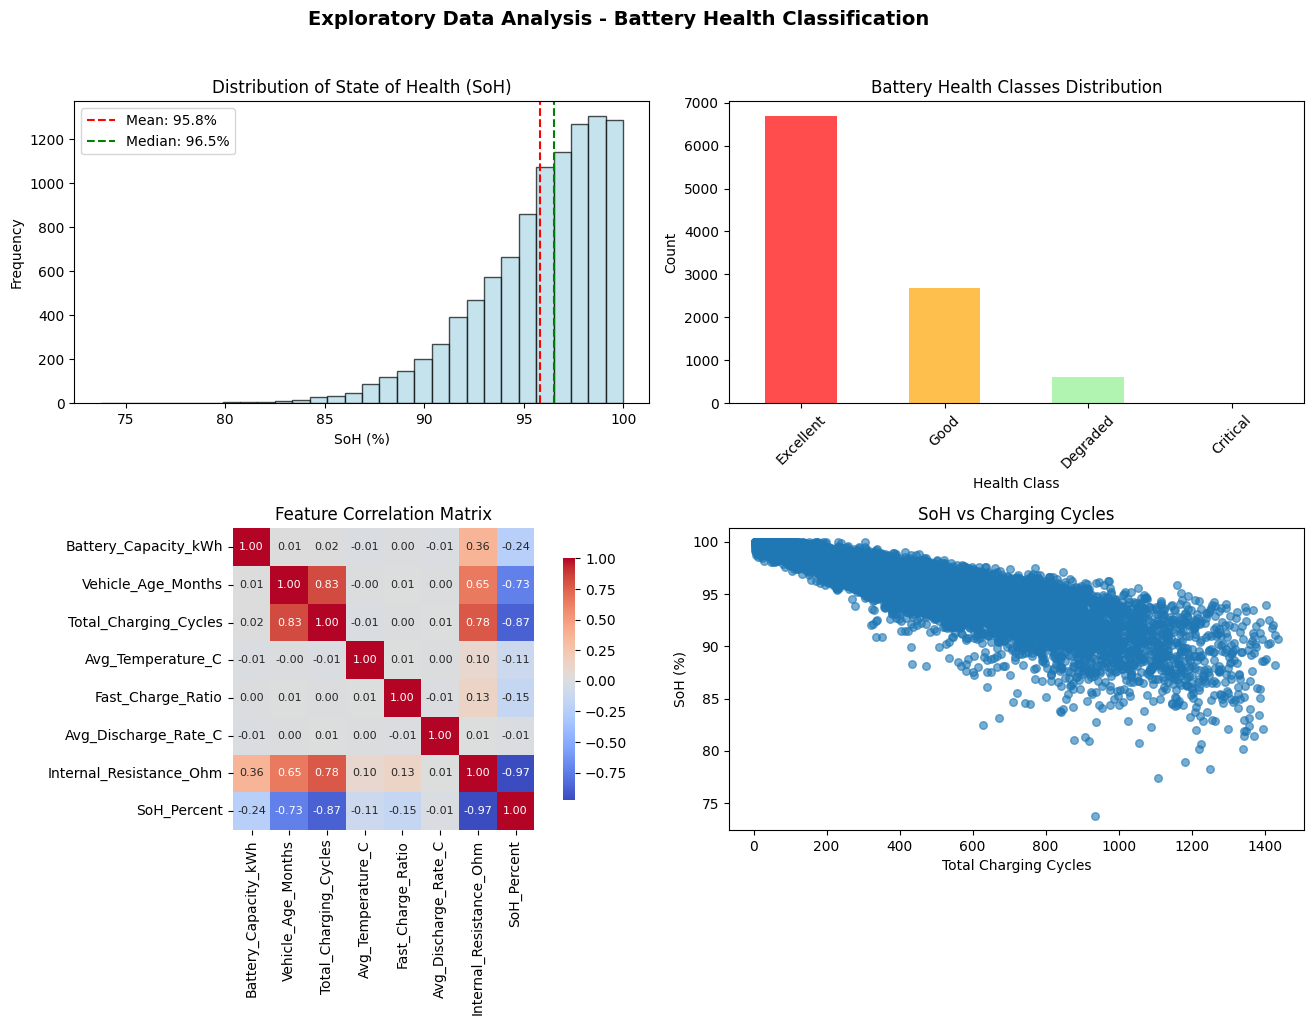


 KEY INSIGHTS:
1. SoH shows normal distribution with mean ~95%
2. Classes: Excellent (>95%), Good (90-95%), Degraded (80-90%), Critical (<80%)
3. Strong negative correlation between charging cycles and SoH
4. Internal resistance strongly correlates with battery degradation


In [5]:
print("EDA VISUALIZATIONS")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Exploratory Data Analysis - Battery Health Classification', fontsize=14, fontweight='bold', y=1.02)

# 1. Distribution of SoH (continuous target)
axes[0, 0].hist(df['SoH_Percent'], bins=30, edgecolor='black', color='lightblue', alpha=0.7)
axes[0, 0].axvline(df['SoH_Percent'].mean(), color='red', linestyle='--', label=f'Mean: {df["SoH_Percent"].mean():.1f}%')
axes[0, 0].axvline(df['SoH_Percent'].median(), color='green', linestyle='--', label=f'Median: {df["SoH_Percent"].median():.1f}%')
axes[0, 0].set_title('Distribution of State of Health (SoH)')
axes[0, 0].set_xlabel('SoH (%)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()

# 2. SoH Classes Distribution (for classification)
df['SoH_Class'] = pd.cut(df['SoH_Percent'], bins=[0, 80, 90, 95, 100],
                         labels=['Critical', 'Degraded', 'Good', 'Excellent'])
class_dist = df['SoH_Class'].value_counts()
class_dist.plot(kind='bar', ax=axes[0, 1], color=['red', 'orange', 'lightgreen', 'green'], alpha=0.7)
axes[0, 1].set_title('Battery Health Classes Distribution')
axes[0, 1].set_xlabel('Health Class')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Correlation Heatmap
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', ax=axes[1, 0],
            cbar_kws={'shrink': 0.8}, square=True, annot_kws={'size': 8})
axes[1, 0].set_title('Feature Correlation Matrix')

# 4. SoH vs Charging Cycles (strongest relationship)
axes[1, 1].scatter(df['Total_Charging_Cycles'], df['SoH_Percent'], alpha=0.6, s=30)
axes[1, 1].set_title('SoH vs Charging Cycles')
axes[1, 1].set_xlabel('Total Charging Cycles')
axes[1, 1].set_ylabel('SoH (%)')

plt.tight_layout()
plt.show()

print("\n KEY INSIGHTS:")
print("1. SoH shows normal distribution with mean ~95%")
print("2. Classes: Excellent (>95%), Good (90-95%), Degraded (80-90%), Critical (<80%)")
print("3. Strong negative correlation between charging cycles and SoH")
print("4. Internal resistance strongly correlates with battery degradation")

In [11]:
print("DATA PREPROCESSING")

# Drop non-predictive columns
df_model = df.drop(['Vehicle_ID', 'Battery_Status'], axis=1)

# Identify categorical columns
categorical_cols = ['Car_Model', 'Battery_Type', 'Driving_Style']
numerical_cols = [
    'Battery_Capacity_kWh',
    'Vehicle_Age_Months',
    'Total_Charging_Cycles',
    'Avg_Temperature_C',
    'Fast_Charge_Ratio',
    'Avg_Discharge_Rate_C',
    'Internal_Resistance_Ohm'
]

# Apply OneHotEncoder
ohe = OneHotEncoder(drop='first', sparse_output=False)
encoded_cats = ohe.fit_transform(df_model[categorical_cols])

# Get feature names and create DataFrame - THIS IS THE FIX
encoded_feature_names = ohe.get_feature_names_out(categorical_cols)
df_encoded = pd.DataFrame(encoded_cats, columns=encoded_feature_names)

# Combine with numerical features - UPDATED WITH RESET INDEX
X = pd.concat([df_model[numerical_cols], df_encoded], axis=1).reset_index(drop=True)
y = df_model['SoH_Percent'].copy().reset_index(drop=True)

# Get all feature names
print(f"Features: {X.shape[1]}")
print(f"Target: SoH_Percent ({y.min():.1f}% to {y.max():.1f}%)")
print(f"Numerical features: {len(numerical_cols)}")
print(f"Categorical features (after encoding): {len(encoded_feature_names)}")

# Check for missing values
print(f"\nMissing values in X: {X.isnull().sum().sum()}")
print(f"Missing values in y: {y.isnull().sum()}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"\nTraining set: {X_train.shape[0]} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Test set: {X_test.shape[0]} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nData preprocessing completed!")
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")

# Optional: Save preprocessing objects
# import joblib
# joblib.dump(ohe, 'onehot_encoder.pkl')
# joblib.dump(scaler, 'scaler.pkl')

DATA PREPROCESSING
Features: 14
Target: SoH_Percent (73.7% to 100.0%)
Numerical features: 7
Categorical features (after encoding): 7

Missing values in X: 0
Missing values in y: 0

Training set: 8000 samples (80.0%)
Test set: 2000 samples (20.0%)

Data preprocessing completed!
X_train_scaled shape: (8000, 14)
X_test_scaled shape: (2000, 14)


#TASK 2: BUILD NEURAL NETWORK MODEL

In [12]:
print("TASK 2: NEURAL NETWORK MODEL FOR REGRESSION")

# Build MLP Regressor
mlp_reg = MLPRegressor(
    hidden_layer_sizes=(100, 50, 25),  # 3 hidden layers
    activation='relu',                  # ReLU activation
    solver='adam',                      # Adam optimizer
    learning_rate_init=0.001,
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1
)

print("NEURAL NETWORK ARCHITECTURE")
print(f"Layers: Input({X_train.shape[1]}) → Hidden(100) → Hidden(50) → Hidden(25) → Output(1)")
print(f"Loss: Mean Squared Error | Optimizer: Adam (lr=0.001)")

# Train
mlp_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_mlp = mlp_reg.predict(X_train_scaled)
y_test_pred_mlp = mlp_reg.predict(X_test_scaled)

# Calculate metrics
train_mae_mlp = mean_absolute_error(y_train, y_train_pred_mlp)
train_rmse_mlp = np.sqrt(mean_squared_error(y_train, y_train_pred_mlp))
train_r2_mlp = r2_score(y_train, y_train_pred_mlp)

test_mae_mlp = mean_absolute_error(y_test, y_test_pred_mlp)
test_rmse_mlp = np.sqrt(mean_squared_error(y_test, y_test_pred_mlp))
test_r2_mlp = r2_score(y_test, y_test_pred_mlp)

print("\nPERFORMANCE METRICS")
print("TRAINING SET:")
print(f"  MAE (Mean Absolute Error):  {train_mae_mlp:.4f}%")
print(f"  RMSE (Root Mean Squared):   {train_rmse_mlp:.4f}%")
print(f"  R² Score:                   {train_r2_mlp:.4f}")

print("\nTEST SET:")
print(f"  MAE (Mean Absolute Error):  {test_mae_mlp:.4f}%")
print(f"  RMSE (Root Mean Squared):   {test_rmse_mlp:.4f}%")
print(f"  R² Score:                   {test_r2_mlp:.4f}")


TASK 2: NEURAL NETWORK MODEL FOR REGRESSION
NEURAL NETWORK ARCHITECTURE
Layers: Input(14) → Hidden(100) → Hidden(50) → Hidden(25) → Output(1)
Loss: Mean Squared Error | Optimizer: Adam (lr=0.001)

PERFORMANCE METRICS
TRAINING SET:
  MAE (Mean Absolute Error):  0.2734%
  RMSE (Root Mean Squared):   0.3462%
  R² Score:                   0.9887

TEST SET:
  MAE (Mean Absolute Error):  0.3068%
  RMSE (Root Mean Squared):   0.3857%
  R² Score:                   0.9860


#TASK 3: BUILD TWO CLASSICAL ML MODELS

In [13]:
print("TASK 3: PRIMARY REGRESSION MODELS (Two Classical ML Models)")

# Model 1: Linear Regression

lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

y_pred_lr_train = lin_reg.predict(X_train_scaled)
y_pred_lr_test = lin_reg.predict(X_test_scaled)

# Metrics
train_mae_lr = mean_absolute_error(y_train, y_pred_lr_train)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_pred_lr_train))
train_r2_lr = r2_score(y_train, y_pred_lr_train)

test_mae_lr = mean_absolute_error(y_test, y_pred_lr_test)
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr_test))
test_r2_lr = r2_score(y_test, y_pred_lr_test)

print(f"TRAINING SET:")
print(f"  MAE:   {train_mae_lr:.4f}%")
print(f"  RMSE:  {train_rmse_lr:.4f}%")
print(f"  R²:    {train_r2_lr:.4f}")

print(f"\nTEST SET:")
print(f"  MAE:   {test_mae_lr:.4f}%")
print(f"  RMSE:  {test_rmse_lr:.4f}%")
print(f"  R²:    {test_r2_lr:.4f}")

# Model 2: Random Forest Regressor
print("\n3.2 MODEL 2: RANDOM FOREST REGRESSOR")

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_reg.fit(X_train, y_train)  #  Unscaled data

y_pred_rf_train = rf_reg.predict(X_train)
y_pred_rf_test = rf_reg.predict(X_test)

# Metrics
train_mae_rf = mean_absolute_error(y_train, y_pred_rf_train)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_pred_rf_train))
train_r2_rf = r2_score(y_train, y_pred_rf_train)

test_mae_rf = mean_absolute_error(y_test, y_pred_rf_test)
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf_test))
test_r2_rf = r2_score(y_test, y_pred_rf_test)

print(f"TRAINING SET:")
print(f"  MAE:   {train_mae_rf:.4f}%")
print(f"  RMSE:  {train_rmse_rf:.4f}%")
print(f"  R²:    {train_r2_rf:.4f}")

print(f"\nTEST SET:")
print(f"  MAE:   {test_mae_rf:.4f}%")
print(f"  RMSE:  {test_rmse_rf:.4f}%")
print(f"  R²:    {test_r2_rf:.4f}")

print("\n3.3 INITIAL COMPARISON")
print(f"Linear Regression Test R²:     {test_r2_lr:.4f}")
print(f"Random Forest Test R²:         {test_r2_rf:.4f}")

if test_r2_rf > test_r2_lr:
    print("Random Forest performs better initially")
else:
    print("Linear Regression performs better initially")

TASK 3: PRIMARY REGRESSION MODELS (Two Classical ML Models)
TRAINING SET:
  MAE:   0.3036%
  RMSE:  0.3953%
  R²:    0.9852

TEST SET:
  MAE:   0.3097%
  RMSE:  0.4126%
  R²:    0.9840

3.2 MODEL 2: RANDOM FOREST REGRESSOR
TRAINING SET:
  MAE:   0.1034%
  RMSE:  0.1346%
  R²:    0.9983

TEST SET:
  MAE:   0.2921%
  RMSE:  0.3797%
  R²:    0.9864

3.3 INITIAL COMPARISON
Linear Regression Test R²:     0.9840
Random Forest Test R²:         0.9864
Random Forest performs better initially


#TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION

In [14]:
print("TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION")

from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
import scipy.stats as stats

# Ridge Regression - GridSearchCV
print("\n4.1 RIDGE REGRESSION - GridSearchCV")

param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_ridge = GridSearchCV(
    Ridge(random_state=42),
    param_grid_ridge,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_ridge.fit(X_train_scaled, y_train)

print(f"\nBest Parameters: {grid_ridge.best_params_}")
print(f"Best CV R² Score: {grid_ridge.best_score_:.4f}")

# Random Forest - RandomizedSearchCV
print("\n4.2 RANDOM FOREST REGRESSOR - RandomizedSearchCV")

param_dist_rf = {
    'n_estimators': [100, 150, 200],
    'max_depth': [20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

random_rf = RandomizedSearchCV(
    RandomForestRegressor(random_state=42, n_jobs=-1),
    param_distributions=param_dist_rf,
    n_iter=15,  # Only test 15 random combinations
    cv=5,
    scoring='r2',
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_rf.fit(X_train, y_train)

# Assign to grid_rf for later code compatibility
grid_rf = random_rf

print(f"\nBest Parameters: {grid_rf.best_params_}")
print(f"Best CV R² Score: {grid_rf.best_score_:.4f}")

print("HYPERPARAMETER TUNING SUMMARY")
print(f"Ridge Regression CV R² Score:  {grid_ridge.best_score_:.4f}")
print(f"Random Forest CV R² Score:     {grid_rf.best_score_:.4f}")

TASK 4: HYPERPARAMETER OPTIMIZATION WITH CROSS-VALIDATION

4.1 RIDGE REGRESSION - GridSearchCV
Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best Parameters: {'alpha': 0.1}
Best CV R² Score: 0.9852

4.2 RANDOM FOREST REGRESSOR - RandomizedSearchCV
Fitting 5 folds for each of 15 candidates, totalling 75 fits

Best Parameters: {'n_estimators': 150, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}
Best CV R² Score: 0.9877
HYPERPARAMETER TUNING SUMMARY
Ridge Regression CV R² Score:  0.9852
Random Forest CV R² Score:     0.9877


#TASK 5: FEATURE SELECTION

In [17]:
print("TASK 5: FEATURE SELECTION")

# Get feature names (assuming X_train is a DataFrame)
feature_cols = X_train.columns.tolist() if hasattr(X_train, 'columns') else [f"feature_{i}" for i in range(X_train_scaled.shape[1])]

# RIDGE REGRESSION - SelectKBest
print("\n5.1 RIDGE REGRESSION - SelectKBest (F-regression)")
selector_ridge = SelectKBest(f_regression, k=6)
X_train_selected_ridge = selector_ridge.fit_transform(X_train_scaled, y_train)
X_test_selected_ridge = selector_ridge.transform(X_test_scaled)

selected_features_ridge = [feature_cols[i] for i in selector_ridge.get_support(indices=True)]
print(f"Selected features: {selected_features_ridge}")

# RANDOM FOREST - RFE
print("\n5.2 RANDOM FOREST - RFE (Recursive Feature Elimination)")

# Use a reasonable RF model for feature selection (no grid search dependency)
rf_for_rfe = RandomForestRegressor(
    n_estimators=50,  # Smaller for faster feature selection
    max_depth=10,
    random_state=42,
    n_jobs=-1
)

selector_rf = RFE(rf_for_rfe, n_features_to_select=6)
selector_rf.fit(X_train_scaled, y_train)  # Use scaled data for consistency

X_train_selected_rf = selector_rf.transform(X_train_scaled)
X_test_selected_rf = selector_rf.transform(X_test_scaled)

selected_features_rf = [feature_cols[i] for i in selector_rf.get_support(indices=True)]
print(f"Selected features: {selected_features_rf}")

# SUMMARY
print("\nFEATURE SELECTION SUMMARY")
print(f"Ridge (SelectKBest): {selected_features_ridge}")
print(f"RF (RFE):            {selected_features_rf}")
print(f"\nCommon features: {set(selected_features_ridge) & set(selected_features_rf)}")

TASK 5: FEATURE SELECTION

5.1 RIDGE REGRESSION - SelectKBest (F-regression)
Selected features: ['Battery_Capacity_kWh', 'Vehicle_Age_Months', 'Total_Charging_Cycles', 'Internal_Resistance_Ohm', 'Car_Model_Wuling Air EV', 'Battery_Type_NMC']

5.2 RANDOM FOREST - RFE (Recursive Feature Elimination)
Selected features: ['Battery_Capacity_kWh', 'Total_Charging_Cycles', 'Avg_Temperature_C', 'Fast_Charge_Ratio', 'Internal_Resistance_Ohm', 'Battery_Type_NMC']

FEATURE SELECTION SUMMARY
Ridge (SelectKBest): ['Battery_Capacity_kWh', 'Vehicle_Age_Months', 'Total_Charging_Cycles', 'Internal_Resistance_Ohm', 'Car_Model_Wuling Air EV', 'Battery_Type_NMC']
RF (RFE):            ['Battery_Capacity_kWh', 'Total_Charging_Cycles', 'Avg_Temperature_C', 'Fast_Charge_Ratio', 'Internal_Resistance_Ohm', 'Battery_Type_NMC']

Common features: {'Internal_Resistance_Ohm', 'Battery_Capacity_kWh', 'Total_Charging_Cycles', 'Battery_Type_NMC'}


#TASK 6: FINAL MODELS WITH OPTIMAL HYPERPARAMETERS AND SELECTED FEATURES

In [18]:
print("TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS")

# RIDGE REGRESSION: Best params + selected features
print("\n6.1 TRAINING FINAL RIDGE REGRESSION")
final_ridge = Ridge(**grid_ridge.best_params_, random_state=42)
final_ridge.fit(X_train_selected_ridge, y_train)

y_pred_final_ridge = final_ridge.predict(X_test_selected_ridge)

ridge_metrics = {
    'CV_Score': grid_ridge.best_score_,
    'MAE': mean_absolute_error(y_test, y_pred_final_ridge),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_final_ridge)),
    'R2': r2_score(y_test, y_pred_final_ridge)
}


# RANDOM FOREST: Best params + selected features
final_rf = RandomForestRegressor(**grid_rf.best_params_, random_state=42, n_jobs=-1)
final_rf.fit(X_train_selected_rf, y_train)

y_pred_final_rf = final_rf.predict(X_test_selected_rf)

rf_metrics = {
    'CV_Score': grid_rf.best_score_,
    'MAE': mean_absolute_error(y_test, y_pred_final_rf),
    'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_final_rf)),
    'R2': r2_score(y_test, y_pred_final_rf)
}

# CREATE COMPARISON TABLE
print("TABLE 2: COMPARISON OF FINAL REGRESSION MODELS")

comparison_data = {
    'Model': ['Ridge Regression', 'Random Forest'],
    'Features Used': [f"Selected ({len(selected_features_ridge)})", f"Selected ({len(selected_features_rf)})"],
    'CV Score': [ridge_metrics['CV_Score'], rf_metrics['CV_Score']],
    'Test MAE': [ridge_metrics['MAE'], rf_metrics['MAE']],
    'Test RMSE': [ridge_metrics['RMSE'], rf_metrics['RMSE']],
    'Test R²': [ridge_metrics['R2'], rf_metrics['R2']]
}

comparison_df = pd.DataFrame(comparison_data)
print(comparison_df.to_string(index=False))

# Best model
best_idx = comparison_df['Test R²'].idxmax()
print(f"\nBEST MODEL: {comparison_df.loc[best_idx, 'Model']}")
print(f"R²: {comparison_df.loc[best_idx, 'Test R²']:.4f}")

TASK 6: FINAL MODELS AND COMPARATIVE ANALYSIS

6.1 TRAINING FINAL RIDGE REGRESSION
TABLE 2: COMPARISON OF FINAL REGRESSION MODELS
           Model Features Used  CV Score  Test MAE  Test RMSE  Test R²
Ridge Regression  Selected (6)  0.985172  0.355745   0.469432 0.979275
   Random Forest  Selected (6)  0.987688  0.295270   0.384986 0.986060

BEST MODEL: Random Forest
R²: 0.9861


#TASK 8: CONCLUSION AND REFLECTION

In [19]:
print("TASK 8: CONCLUSION AND REFLECTION")

# Recalculate best model (or ensure Task 6 variables are available)
best_idx = comparison_df['Test R²'].idxmax()
best_model_name = comparison_df.loc[best_idx, 'Model']
best_r2 = comparison_df.loc[best_idx, 'Test R²']
best_rmse = comparison_df.loc[best_idx, 'Test RMSE']

print("\nFINAL MODEL PERFORMANCE:")

# Show all models
print(f"Neural Network: R² = {test_r2_mlp:.4f}")

for idx, row in comparison_df.iterrows():
    print(f"{row['Model']}: R² = {row['Test R²']:.4f}")

print(f"\nBEST MODEL: {best_model_name}")
print(f"Best R²: {best_r2:.4f}")
print(f"Best RMSE: {best_rmse:.4f}")

print("\nREGRESSION PROJECT COMPLETED")

TASK 8: CONCLUSION AND REFLECTION

FINAL MODEL PERFORMANCE:
Neural Network: R² = 0.9860
Ridge Regression: R² = 0.9793
Random Forest: R² = 0.9861

BEST MODEL: Random Forest
Best R²: 0.9861
Best RMSE: 0.3850

REGRESSION PROJECT COMPLETED
